In [1]:
# Importing required libraries

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical operations and handling arrays
import numpy as np

# matplotlib.pyplot for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# seaborn for statistical data visualization built on top of matplotlib
import seaborn as sns

# train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# RandomForestRegressor and GradientBoostingRegressor for regression tasks using ensemble methods
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# mean_squared_error to evaluate the performance of the regression models
from sklearn.metrics import mean_squared_error

# Disable warnings to prevent cluttering output with non-critical warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load training and test datasets

# Load the training dataset from a CSV file located at '/content/train.csv'
train = pd.read_csv('./train.csv')

# Load the test dataset from a CSV file located at '/content/test.csv'
test = pd.read_csv('./test.csv')

# Preview the datasets by displaying the first few rows

# Display the first 5 rows of the training dataset
print("Training Data:")
display(train.head())

# Display the first 5 rows of the test dataset
print("\nTest Data:")
display(test.head())

Training Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Test Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
# Check for data types and missing values in training set

# Display information about the training dataset, including column names, non-null counts, and data types
print("Training Data Info:")
print(train.info())

# Check for missing values in the training dataset
# The isnull() method returns a DataFrame indicating True for missing values
# sum() aggregates these values by column, counting how many are missing
# sort_values(ascending=False) sorts the columns by the number of missing values in descending order
# head(20) limits the output to the top 20 columns with the most missing values
print("\nMissing Values in Training Data:")
print(train.isnull().sum().sort_values(ascending=False).head(20))

# Check for missing values in the test set
# Repeat the same process as for the training set but for the test dataset
print("\nMissing Values in Test Data:")
print(test.isnull().sum().sort_values(ascending=False).head(20))

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

In [4]:
# Check the shape of the datasets

# Print the dimensions (number of rows and columns) of the training dataset
# The .shape attribute returns a tuple (rows, columns)
print("Training set shape:", train.shape)

# Print the dimensions (number of rows and columns) of the test dataset
# The .shape attribute returns a tuple (rows, columns)
print("Test set shape:", test.shape)

# Display summary statistics of the training set
# .describe() generates descriptive statistics such as count, mean, std, min, max, and percentiles for numeric columns
# .transpose() is used to flip rows and columns, so the statistics are displayed in a more readable format
train.describe().transpose()

Training set shape: (1460, 81)
Test set shape: (1459, 80)


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


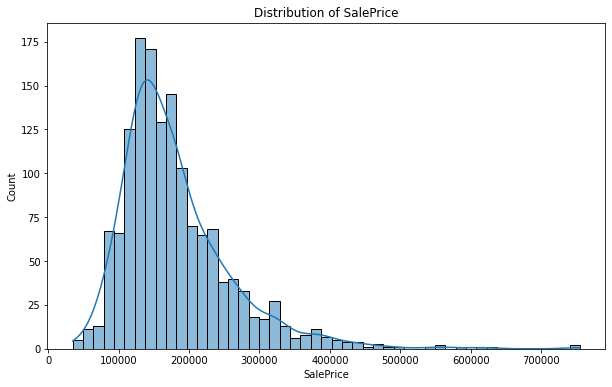

In [5]:
# Importing libraries for plotting

# matplotlib.pyplot is for creating visualizations
import matplotlib.pyplot as plt

# seaborn is for creating statistical visualizations, built on top of matplotlib
import seaborn as sns

# Plotting the distribution of SalePrice

# Create a figure with a specific size (width: 10, height: 6)
plt.figure(figsize=(10, 6))

# sns.histplot creates a histogram with an optional kernel density estimate (kde)
# 'train['SalePrice']' is the column of interest (SalePrice) from the training dataset
# kde=True adds a smoothed line (kernel density estimate) to the histogram
sns.histplot(train['SalePrice'], kde=True)

# Add a title to the plot
plt.title('Distribution of SalePrice')

# Label the x-axis
plt.xlabel('SalePrice')

# Show the plot
plt.show()

In [6]:
# Log-transform SalePrice to make it more normal

# Apply a log transformation to the SalePrice column in the training dataset
# np.log1p() is used instead of np.log() because it computes log(1 + x), which handles zero values
# This transformation helps to make the distribution of SalePrice more normal (e.g., reduce skewness)
train['SalePrice'] = np.log1p(train['SalePrice'])

In [7]:
# Checking missing values in training and test sets

# Calculate the missing values in the training dataset
# isnull() returns a DataFrame of True (missing) or False (not missing) for each cell
# sum() counts the number of missing values (True) for each column
# sort_values(ascending=False) sorts the columns in descending order by the number of missing values
missing_train = train.isnull().sum().sort_values(ascending=False)

# Calculate the missing values in the test dataset (same process as for the training set)
missing_test = test.isnull().sum().sort_values(ascending=False)

# Display missing values in the training data (only show columns with missing values)
print("Missing values in Training Data:")
# Filter out columns without missing values and display the top 20 columns with the most missing data
print(missing_train[missing_train > 0].head(20))

# Display missing values in the test data (only show columns with missing values)
print("\nMissing values in Test Data:")
# Filter out columns without missing values and display the top 20 columns with the most missing data
print(missing_test[missing_test > 0].head(20))

Missing values in Training Data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Missing values in Test Data:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64


In [8]:
# Print the columns in the training and test datasets

# Display the column names in the training dataset
# The .columns attribute returns an Index object containing the column names of the DataFrame
print("Columns in training data:", train.columns)

# Display the column names in the test dataset
# The .columns attribute returns an Index object containing the column names of the DataFrame
print("Columns in test data:", test.columns)

Columns in training data: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

In [9]:
# Separate the target variable 'SalePrice' from training data

# Check if 'SalePrice' exists in the training dataset columns
if 'SalePrice' in train.columns:
    # Assign 'SalePrice' to y (target variable)
    y = train['SalePrice']
    
    # Drop 'SalePrice' from the features (X) to keep only the predictor variables
    X = train.drop(['SalePrice'], axis=1)
else:
    # Raise an error if 'SalePrice' column is not found in the training data
    raise KeyError("SalePrice column not found in the training data")

# Now align training and test features to have the same columns

# The .align() method aligns two DataFrames (X and test) based on their columns
# join='inner' ensures that only the common columns between X and test are kept
# axis=1 means we're aligning by columns (features)
X, test = X.align(test, join='inner', axis=1)

# Fill missing values for categorical features

# Loop through columns with categorical data (dtype='object')
for col in X.select_dtypes(include=['object']).columns:
    # Fill missing values in categorical columns with the string "None"
    X[col] = X[col].fillna("None")
    test[col] = test[col].fillna("None")

# Fill missing values for numerical features with median

# Loop through columns with numerical data (exclude 'object' dtype)
for col in X.select_dtypes(exclude=['object']).columns:
    # Fill missing values in numerical columns with the median of the column
    X[col] = X[col].fillna(X[col].median())
    test[col] = test[col].fillna(test[col].median())

In [10]:
# Mapping quality-related features

# Define a dictionary that maps quality categories to numerical values
# Higher values indicate better quality: 'Ex' (Excellent) is 5, 'Gd' (Good) is 4, and so on
quality_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0
}

# Loop through the list of quality-related columns in the dataset
for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
            'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']:
    # Map the quality values in both the training and test datasets to the defined numerical values
    # The map() function replaces each value in the column based on the quality_mapping dictionary
    train[col] = train[col].map(quality_mapping)
    test[col] = test[col].map(quality_mapping)

In [11]:
# Separate the target variable before aligning (only if it exists in the training data)

# Check if the 'SalePrice' column exists in the training data
if 'SalePrice' in train.columns:
    # Extract the target variable (SalePrice) into 'y'
    y = train['SalePrice']
    
    # Drop 'SalePrice' from the training data, leaving only the feature columns in 'train'
    train = train.drop(['SalePrice'], axis=1)
else:
    # Raise an error if 'SalePrice' is not found in the training data
    raise KeyError("SalePrice column not found in the training data")

# Align train and test datasets, adding missing columns to each as needed

# The .align() function aligns the columns of the train and test datasets, ensuring they have the same columns.
# join='inner' means only the columns that exist in both datasets will be kept.
# axis=1 means that the alignment is happening based on columns (features).
train, test = train.align(test, join='inner', axis=1)

# Now we can proceed with mapping quality-related features safely

# Define the quality_mapping dictionary for mapping categorical quality ratings to numerical values
# 'None' is used for missing values (instead of 'NA')
quality_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0  # 'None' for missing values
}

# Loop through the list of quality-related columns to apply the mapping
for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
            'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']:
    # Check if the column exists in the training data
    if col in train.columns:
        # Apply the quality mapping to both the training and test datasets
        # The .map() function replaces the original categorical values with the corresponding numerical values
        train[col] = train[col].map(quality_mapping)
        test[col] = test[col].map(quality_mapping)

In [12]:
# One-Hot Encoding for remaining categorical features

# Use pd.get_dummies() to apply One-Hot Encoding to categorical features in both the training and test datasets
# This creates binary columns for each category in the categorical columns (e.g., "Color_Red", "Color_Blue" for a 'Color' column with categories "Red", "Blue")
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align train and test data to ensure they have the same columns after encoding

# After applying One-Hot Encoding, the train and test datasets might have different columns.
# The .align() method ensures that both datasets have the same columns, keeping only the common ones.
# join='inner' ensures that only the columns present in both datasets are kept.
# axis=1 means that alignment is done on columns (features).
train, test = train.align(test, join='inner', axis=1)

In [14]:
# Assuming y is already defined as the SalePrice column
# If 'SalePrice' was previously separated into 'y', we don't need to redefine it.
# However, if it's not already defined, you can define it like this:
# y = train['SalePrice']

# Since 'SalePrice' is already separated, we just set X to the training data without 'SalePrice'
# In this case, the 'train' dataset already excludes the 'SalePrice' column (from the earlier steps)
X = train.copy()  # Make a copy of the training data (X), excluding the target variable

# Split data into training and validation sets

# Import train_test_split function to split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and validation (20%) sets
# X_train and y_train are the features and target for the training set
# X_valid and y_valid are the features and target for the validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Import the necessary libraries for the model and evaluation
from sklearn.ensemble import RandomForestRegressor  # Random Forest algorithm for regression
from sklearn.metrics import mean_squared_error  # Function to compute Mean Squared Error
import numpy as np  # For numerical operations, such as calculating the square root

# Initialize the Random Forest model
# n_estimators=100 means the model will use 100 decision trees
# random_state=0 ensures that the results are reproducible by fixing the seed
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
# The model is trained on X_train (features) and y_train (target)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set (X_valid)
# This step generates the predicted target values (y_pred) based on the input features in X_valid
y_pred = rf_model.predict(X_valid)

# Calculate the Root Mean Squared Error (RMSE)
# RMSE is a common metric to evaluate the performance of regression models
# It measures the average magnitude of error between predicted and actual values
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

# Print the RMSE of the Random Forest model to evaluate its performance
print("RMSE for Random Forest Model:", rmse)

RMSE for Random Forest Model: 0.13943149773474023


In [16]:
# Import the Gradient Boosting Regressor model from sklearn
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting algorithm for regression

# Initialize the Gradient Boosting model
# n_estimators=100 means the model will use 100 boosting stages (trees).
# learning_rate=0.1 controls the contribution of each tree in the boosting process.
# random_state=0 ensures reproducibility of results.
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Fit the model on the training data
# The model is trained on the features (X_train) and target (y_train)
gb_model.fit(X_train, y_train)

# Make predictions on the validation set (X_valid)
# y_pred_gb contains the predicted target values from the model for the validation data
y_pred_gb = gb_model.predict(X_valid)

# Calculate the Root Mean Squared Error (RMSE) for the Gradient Boosting model
# RMSE is used to measure the difference between the predicted values and the actual values
rmse_gb = np.sqrt(mean_squared_error(y_valid, y_pred_gb))

# Print the RMSE of the Gradient Boosting model to evaluate its performance
print("RMSE for Gradient Boosting Model:", rmse_gb)

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values